#  CNN的优化 

基于04a,使用图形增广对CNN模型进行优化

在线notebook：https://www.kaggle.com/code/abrahamcheng/cnn-tuning


对于图形数据的增广，即将有限数量的数据扩充为更多。不仅仅是针对CNN网络，对于其他神经网络模型甚至非神经网络模型而言，数据量都越大越好。随着数据量的增加，模型过拟合的风险就会减小。

In [1]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
import os # 导入OS
import cv2 # 导入Open CV工具箱

print(os.listdir('../input/flowers-recognition/flowers')) #打印目录结构
daisy_dir='../input/flowers-recognition/flowers/daisy' #雏菊目录
rose_dir='../input/flowers-recognition/flowers/rose' #玫瑰目录
sunflower_dir='../input/flowers-recognition/flowers/sunflower' #向日葵目录
tulip_dir='../input/flowers-recognition/flowers/tulip' #郁金香目录

X = [] #初始化
y_label = [] #初始化
imgsize = 150 #图片大小
# 定义一个函数读入花的图片
def training_data(label,data_dir):
    print ("正在读入：", data_dir) 
    for img in os.listdir(data_dir): #目录
        path = os.path.join(data_dir,img) #目录+文件名
        img = cv2.imread(path,cv2.IMREAD_COLOR) #读入图片
        img = cv2.resize(img,(imgsize,imgsize)) #设定图片像素维度
        X.append(np.array(img)) #X特征集
        y_label.append(str(label)) #y标签，即花的类别
# 读入目录中的图片
training_data('daisy',daisy_dir) #读入雏菊
training_data('rose',rose_dir) #读入玫瑰
training_data('sunflower',sunflower_dir) #读入向日葵
training_data('tulip',tulip_dir) #读入郁金香

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
正在读入： ../input/flowers-recognition/flowers/daisy
正在读入： ../input/flowers-recognition/flowers/rose
正在读入： ../input/flowers-recognition/flowers/sunflower
正在读入： ../input/flowers-recognition/flowers/tulip


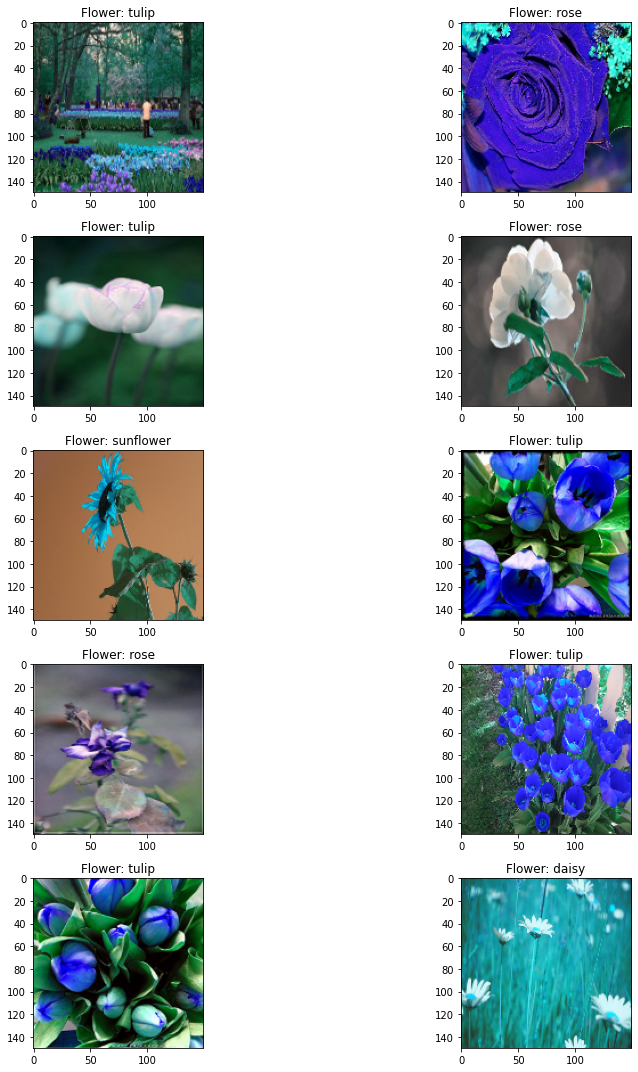

In [2]:
import matplotlib.pyplot as plt # 导入matplotlib
import random as rdm # 导入随机数工具
# 随机显示几张漂亮的花朵图片吧
fig,ax=plt.subplots(5,2) #画布
fig.set_size_inches(15,15) #大小
for i in range(5):
    for j in range (2):
        r=rdm.randint(0,len(X)) #随机选择图片
        ax[i,j].imshow(X[r]) #显示图片
        ax[i,j].set_title('Flower: '+y_label[r]) #花的类别
plt.tight_layout() #绘图

In [3]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码工具
from tensorflow.keras.utils import to_categorical # 导入One-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码
y = to_categorical(y,4) # 将标签转换为One-hot编码
X = np.array(X) # 将X从列表转换为张量数组

In [4]:
y #看一看y张量什么样，这是分类标签

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [5]:
X = X/255 # 将X张量归一化

In [6]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, #拆分数据集
                             test_size=0.2,random_state=1)

In [7]:
from tensorflow.keras import layers # 导入所有层 行1
from tensorflow.keras import models # 导入所有模型 行2
cnn = models.Sequential() # 贯序模型 行3
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 输入卷积层 行4
                        input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行5
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积层 行6
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行7
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行8
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行9
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积层 行10
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化层 行11
cnn.add(layers.Flatten()) # 展平层 行12
cnn.add(layers.Dense(512, activation='relu')) # 全连接层 行13
cnn.add(layers.Dense(4, activation='softmax')) # 分类输出层 行14
cnn.compile(loss='categorical_crossentropy', # 损失函数 行15
            optimizer='RMSprop', # 优化器
            metrics=['acc']) # 评估指标

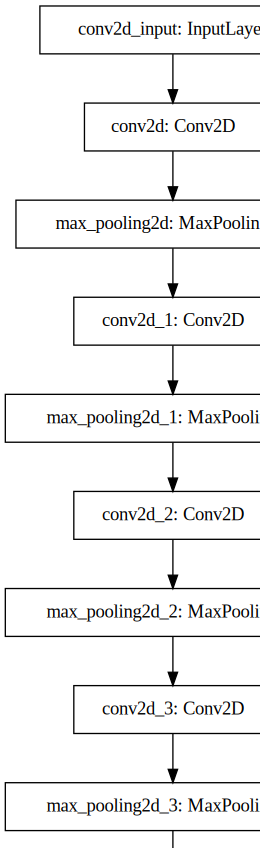

In [8]:
from IPython.display import SVG # 实现神经网络结构的图形化显示
from tensorflow.keras.utils import model_to_dot # 导入model_to_dot工具
SVG(model_to_dot(cnn).create(prog='dot', format='svg')) # 绘图

In [9]:
# 训练网络并把训练过程信息存入history对象
history = cnn.fit(X_train,y_train, #训练数据
                  epochs=30, #训练轮次（梯度下降）
                  validation_split=0.2) #训练的同时进行验证

Epoch 1/30
66/66 [==============================] - 65s 962ms/step - loss: 1.7496 - acc: 0.3351 - val_loss: 1.1385 - val_acc: 0.4704
Epoch 2/30
66/66 [==============================] - 62s 941ms/step - loss: 0.9836 - acc: 0.5692 - val_loss: 1.0155 - val_acc: 0.5277
Epoch 3/30
66/66 [==============================] - 62s 937ms/step - loss: 0.8906 - acc: 0.6346 - val_loss: 0.8329 - val_acc: 0.6367
Epoch 4/30
66/66 [==============================] - 61s 928ms/step - loss: 0.7746 - acc: 0.6678 - val_loss: 1.1720 - val_acc: 0.5641
Epoch 5/30
66/66 [==============================] - 62s 933ms/step - loss: 0.7407 - acc: 0.7044 - val_loss: 0.9405 - val_acc: 0.6501
Epoch 6/30
66/66 [==============================] - 62s 946ms/step - loss: 0.6143 - acc: 0.7625 - val_loss: 0.9201 - val_acc: 0.6310
Epoch 7/30
66/66 [==============================] - 62s 938ms/step - loss: 0.5453 - acc: 0.7909 - val_loss: 1.4778 - val_acc: 0.5966
Epoch 8/30
66/66 [==============================] - 63s 949ms/step - 

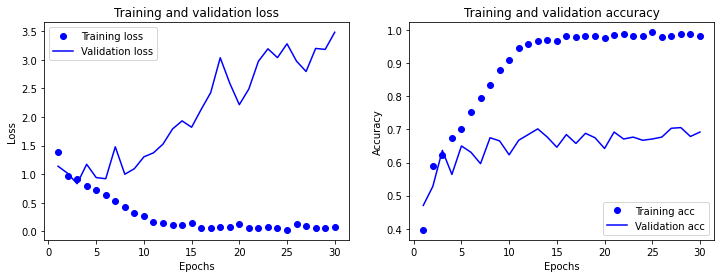

In [10]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss'] #训练损失
    val_loss = history.history['val_loss'] #验证损失
    epochs = range(1, len(loss) + 1) #训练轮次
    plt.figure(figsize=(12,4)) # 图片大小
    plt.subplot(1, 2, 1) #子图1
    plt.plot(epochs, loss, 'bo', label='Training loss') #训练损失
    plt.plot(epochs, val_loss, 'b', label='Validation loss') #验证损失
    plt.title('Training and validation loss') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Loss') #Y轴文字
    plt.legend() #图例
    acc = history.history['acc'] #训练准确率
    val_acc = history.history['val_acc'] #验证准确率
    plt.subplot(1, 2, 2) #子图2
    plt.plot(epochs, acc, 'bo', label='Training acc') #训练准确率
    plt.plot(epochs, val_acc, 'b', label='Validation acc') #验证准确率
    plt.title('Training and validation accuracy') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Accuracy') #Y轴文字
    plt.legend() #图例
    plt.show() #绘图
show_history(history) # 调用这个函数

In [11]:
result = cnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('数据增强之前CNN的测试准确率为',"{0:.2f}%".format(result[1]*100))

21/21 [==============================] - 5s 239ms/step - loss: 3.7207 - acc: 0.6723
数据增强之前CNN的测试准确率为 67.23%


In [12]:
prediction = cnn.predict(X_test) #预测测试集的图片分类

In [13]:
prediction[0] #第一张图片的分类

array([5.2576020e-08, 6.9633052e-06, 9.4048914e-07, 9.9999201e-01],
      dtype=float32)

In [14]:
print('第一张测试图片的分类结果为:', np.argmax(prediction[0]))

第一张测试图片的分类结果为: 3


<div style="text-align:center;">
  <span style="color:red;">从这里开始</span>
</div>


## 开始进行数据增强了！

在 Keras 中，我们可以用 Image Data Generator 工具来定义一个数据增广器

In [15]:
# 定义一个数据增强器，并设定各种增强选项
from tensorflow.keras.preprocessing.image import ImageDataGenerator #数据增强器
augs_gen = ImageDataGenerator( #各种增强参数
           featurewise_center=False,
           samplewise_center=False,         
           featurewise_std_normalization=False,          
           samplewise_std_normalization=False,  
           zca_whitening=False, 
           rotation_range=10,  
           zoom_range = 0.1, 
           width_shift_range=0.2,  
           height_shift_range=0.2,
           horizontal_flip=True,  
           vertical_flip=False) 
augs_gen.fit(X_train) # 针对训练集拟合数据增强器

这段代码定义了一个数据增强器，并设置了各种增强选项。下面是对每一行代码的解释：

1. `from tensorflow.keras.preprocessing.image import ImageDataGenerator`：这行代码导入了TensorFlow中用于图像数据增强的ImageDataGenerator类。

2. `augs_gen = ImageDataGenerator(...)`：这行代码创建了一个名为augs_gen的数据增强器对象，通过设置各种参数来定义数据增强的方式。

3. `featurewise_center=False`：这个选项指定是否按特征（列）进行居中处理，默认为False，表示不进行特征居中处理。特征居中处理可以减少数据的整体偏移。

4. `samplewise_center=False`：这个选项指定是否按样本（行）进行居中处理，默认为False，表示不进行样本居中处理。样本居中处理可以消除样本之间的偏移差异。

5. `featurewise_std_normalization=False`：这个选项指定是否按特征进行标准化，默认为False，表示不进行特征标准化处理。特征标准化可以消除特征之间的方差差异。

6. `samplewise_std_normalization=False`：这个选项指定是否按样本进行标准化，默认为False，表示不进行样本标准化处理。样本标准化可以消除样本之间的方差差异。

7. `zca_whitening=False`：这个选项指定是否对输入数据进行ZCA白化处理，默认为False，表示不进行ZCA白化处理。ZCA白化可以减少输入数据中的冗余信息。

8. `rotation_range=10`：这个选项指定图像旋转的角度范围，单位为度，默认为0，表示不进行图像旋转。这里设置为10表示图像可以沿任意方向最多旋转10度。

9. `zoom_range=0.1`：这个选项指定图像缩放的范围，可以是一个小的浮点数或一个表示缩放幅度范围的元组或列表，默认为0，表示不进行图像缩放。这里设置为0.1表示图像可以在0.9倍到1.1倍之间进行缩放。

10. `width_shift_range=0.2`：这个选项指定图像水平偏移的范围，可以是一个小的浮点数或一个表示偏移范围的元组或列表，默认为0，表示不进行水平偏移。这里设置为0.2表示图像可以水平方向上最多偏移图像宽度的20%。

11. `height_shift_range=0.2`：这个选项指定图像垂直偏移的范围，可以是一个小的浮点数或一个表示偏移范围的元组或列表，默认为0，表示不进行垂直偏移。这里设置为0.2表示图像可以垂直方向上最多偏移图像高度的20%。

12. `horizontal_flip=True`：这个选项指定是否进行水平翻转，默认为False，表示不进行水平翻转。这里设置为True表示图像可以进行水平翻转。

13. `vertical_flip=False`：这个选项指定是否进行垂直翻转，默认为False，表示不进行垂直翻转。这里设置为False表示图像不进行垂直翻转。

14. `augs_gen.fit(X_train)`：这行代码使用数据增强器对象对训练集数据X_train进行拟合，以便根据训练集数据的统计特性进行数据增强操作。拟合过程将计算并存储一些统计信息，如均值和标准差，以便在后续的数据增强过程中使用。

In [16]:
# history = cnn.fit_generator( # 使用fit_generator
history = cnn.fit( # 拟合   
    augs_gen.flow(X_train,y_train,batch_size=16), # 增强后的训练集
#     validation_data  = (X_test,y_test), # 指定验证集
#     validation_steps = 100, # 指定验证步长
#     steps_per_epoch  = 100, # 指定每轮步长
    epochs = 30,  # 指定轮次
    verbose = 1) # 指定是否显示训练过程中的信息
# show_history(history) # 调用这个函数

Epoch 1/30
164/164 [==============================] - 78s 474ms/step - loss: 0.9950 - acc: 0.6263
Epoch 2/30
164/164 [==============================] - 78s 472ms/step - loss: 0.8195 - acc: 0.6914
Epoch 3/30
164/164 [==============================] - 78s 472ms/step - loss: 0.7854 - acc: 0.6937
Epoch 4/30
164/164 [==============================] - 78s 473ms/step - loss: 0.7324 - acc: 0.7129
Epoch 5/30
164/164 [==============================] - 77s 471ms/step - loss: 0.7200 - acc: 0.7240
Epoch 6/30
164/164 [==============================] - 78s 474ms/step - loss: 0.7259 - acc: 0.7328
Epoch 7/30
164/164 [==============================] - 77s 471ms/step - loss: 0.6927 - acc: 0.7358
Epoch 8/30
164/164 [==============================] - 77s 470ms/step - loss: 0.6890 - acc: 0.7278
Epoch 9/30
164/164 [==============================] - 77s 469ms/step - loss: 0.6844 - acc: 0.7339
Epoch 10/30
164/164 [==============================] - 77s 470ms/step - loss: 0.6813 - acc: 0.7374
Epoch 11/30
164/164

In [17]:
result = cnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('数据增强之后CNN的测试准确率为',"{0:.2f}%".format(result[1]*100))

21/21 [==============================] - 5s 242ms/step - loss: 0.6025 - acc: 0.8055
数据增强之后CNN的测试准确率为 80.55%
